/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


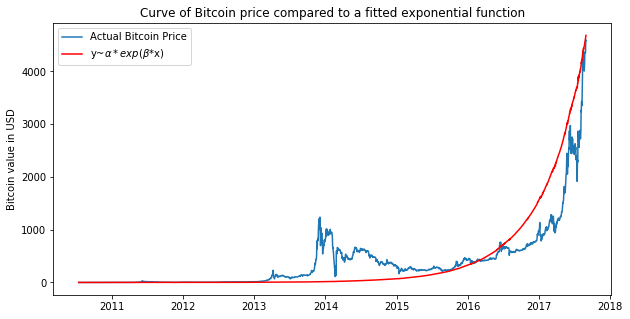

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from statsmodels.tsa.arima_model import ARIMA
data = pd.read_csv('bitcoin.csv').drop('Unnamed: 0',axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

bits_log = np.log(data['Price'])
model = ARIMA(bits_log, order=(1, 1, 1))  
model_fit = model.fit(disp=-1)  

fittedvalues = pd.Series(model_fit.fittedvalues, copy=True)
fitcumsum = fittedvalues.cumsum()
predictions_log = pd.Series(bits_log.iloc[0], index=bits_log.index)
predictions_log = predictions_log.add(fitcumsum,fill_value=0)
predictions = pd.DataFrame(np.exp(predictions_log))


plt.figure(figsize=(10,5))
plt.plot(data['Price'],label='Actual Bitcoin Price')
plt.plot(pd.DataFrame(predictions)[0],color = 'red',label=r'y~$\alpha*exp(\beta$*x)')
plt.title('Curve of Bitcoin price compared to a fitted exponential function')
plt.ylabel('Bitcoin value in USD')
plt.legend()
plt.savefig('bitprice_vs_exponential_curve.png')

plt.show()